In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%precision 4
%matplotlib inline

### Block to load data

In [116]:
airfare_demand_data = pd.read_csv(r'D:\Exercises\ML Lab\airq402.dat.txt', sep='\s+',header=None)
airfare_demand_data_label = pd.read_csv(r'D:\Exercises\ML Lab\airq402.txt', sep='\n+',header=None)
wine_quality_red = pd.read_csv(r'D:\Exercises\ML Lab\winequality-red.csv', sep=';')
wine_quality_white = pd.read_csv(r'D:\Exercises\ML Lab\winequality-white.csv', sep=';')

### Define defintion and methods for gradient, lease square and gradient descent

In [117]:
np.random.RandomState(4)
def produce_random_index(size):
    indexes = np.arange(0,size,1)
    np.random.shuffle(indexes)
    return indexes

In [118]:
#returns the function value
def gradient_value(x,y,b):
    return np.around(-(np.matmul((2)*(np.transpose(x)),(y-np.matmul(x,b)))), decimals=9)

#returns the gradient value
def function_value(x,y,b):
    return np.around(np.sum(y-np.matmul(x,b))**2, decimals=9)

def bold_step(x,y,b,alpha=1):
    alpha_p = 1.1
    alpha_m = 0.5
    alpha*=alpha_p
    d = - gradient_value(x,y,b)
    #print((f(x,y,b) - f(np.add(np.matrix(x),np.array(0.1*d.T)),y,b)) <  0)
    while ((function_value(x,y,b) - function_value(x,y,np.add(b,np.array(alpha*d.T)))) <=  0).all():
        alpha = np.around(alpha*alpha_m , decimals=9)
        #print(f"{alpha}")
    return alpha

def armijo_step_length(x,y,b,alpha=1, delta=0.5, steep = 0.001):
    alpha = 1
    d = - gradient_value(x,y,b)
    while ((function_value(x,y,b) - function_value(x,y,np.add(np.matrix(b),np.array(alpha*d.T)))) <=  (alpha*steep*(d)**2).T).all():
        #print(f"{alpha}")
        alpha = np.around(alpha*delta, decimals=9)
    return alpha

def residual(f_prev,f_curr):
    return np.around(np.mean(np.abs(f_prev-f_curr)), decimals= 9)

def rmse(y,y_pred):
    return np.around(np.sqrt(np.mean(np.asarray(y-y_pred)**2)), decimals= 9)
    
def gradient_descent_bold(x, y,x_t,y_t, alpha=0.000001, tol=1e-6, N=1000):
    residual_plot_test = {}
    residual_plot_train = {}
    rmse_plot = {}
    beta = np.ones((x.shape[1],1))
    #print(f"beta {beta}")
    for k in range(N):
        y_pred = np.matmul(x,beta)
        #print(f"Y {y_pred}")
        gradient = (np.matmul(np.transpose(x),(y-y_pred)))
        #print(f"gradient {y_pred.shape}")
        alpha = bold_step(x,y,beta)
        #print(alpha)
        beta_new = beta + alpha*(gradient)
        #print(f"beta_new {beta_new}")
        residual_plot_train[k] = residual(np.asarray(y-np.matmul(x,beta))**2,np.asarray(y-np.matmul(x,beta_new))**2)
        residual_plot_test[k] = residual(np.asarray(y_t-np.matmul(x_t,beta))**2,np.asarray(y_t-np.matmul(x_t,beta_new))**2)
        rmse_plot[k] =  rmse(y_t, np.matmul(x_t,beta_new))
        #print(f"The new beta {beta_new}\n")
        beta = beta_new
    plot(residual_plot_train,residual_plot_test, rmse_plot, "Gradient Descent using Bold")
    return beta, residual_plot_train, rmse_plot


def gradient_descent_armijo(x, y,x_t,y_t, alpha=0.000001, tol=1e-6, N=1000):
    residual_plot_test = {}
    residual_plot_train = {}
    rmse_plot = {}
    beta = np.ones((x.shape[1],1))
    #print(f"beta {beta}")
    for k in range(N):
        y_pred = np.matmul(x,beta)
        #print(f"Y {y_pred}")
        gradient = (np.matmul(np.transpose(x),(y-y_pred)))
        #print(f"gradient {y_pred.shape}")
        alpha = armijo_step_length(x,y,beta)
        beta_new = beta + alpha*(gradient)
        #print(f"beta_new {beta_new}")
        residual_plot_train[k] = residual((y-np.matmul(x,beta))**2,(y-np.matmul(x,beta_new))**2)
        residual_plot_test[k] = residual((y_t-np.matmul(x_t,beta))**2,(y_t-np.matmul(x_t,beta_new))**2)
        rmse_plot[k] =  rmse(y_t, np.matmul(x_t,beta_new))
        #print(f"The new beta {beta_new}\n")
        beta = beta_new
    plot(residual_plot_train,residual_plot_test, rmse_plot, "Gradient Descent using Arimijo")
    return beta, residual_plot_train, rmse_plot


def gradient_descent(x,y,x_t,y_t, delta=0.5,alpha=0.00001, tol=1e-6, N=10):
    residual_plot_test = {}
    residual_plot_train = {}
    rmse_plot = {}
    beta = np.ones((x.shape[1],1))
    #print(f"beta {beta}")
    for k in range(N):
        y_pred = np.matmul(x,beta)
        #print(f"Y {y_pred}")
        gradient = (np.matmul(np.transpose(x),(y-y_pred)))
        #print(f"gradient {y_pred.shape}")
        beta_new = beta + alpha*(gradient)
        #print(f"beta_new {beta_new}")
        residual_plot_train[k] = residual((y-np.matmul(x,beta))**2,(y-np.matmul(x,beta_new))**2)
        residual_plot_test[k] = residual((y_t-np.matmul(x_t,beta))**2,(y_t-np.matmul(x_t,beta_new))**2)
        rmse_plot[k] =  rmse(y_t, np.matmul(x_t,beta_new))
        #print(f"The new beta {beta_new}\n")
        beta = beta_new
    plot(residual_plot_train,residual_plot_test, rmse_plot, "Gradient Descent with learning rate "+str(alpha))
    return beta, residual_plot_train, rmse_plot

def plot(residual_plot_train,residual_plot_test, rmse_plot,title):
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True,figsize=(16, 10))
    ax1.plot(list(residual_plot_train.keys()),list(residual_plot_train.values()),'-r')
    ax1.plot(list(residual_plot_test.keys()),list(residual_plot_test.values()),'-g')
    ax2.plot(list(rmse_plot.keys()),list(rmse_plot.values()),'-r')
    ax1.legend(['Residual vs Iteration Training','Residual vs Iteration Test'])
    ax2.legend(['MSE vs Iteration'])
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Residual')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('RMSE')
    ax1.grid()
    ax2.grid()
    ax1.set_title(title)
    ax2.set_title(title)
    

### A common stratergy used throughout this exercise by me was forward variable selection regression, which is an greedy approach to select a feature by observing the error with the feature in the model than without it.

## Performing backtracking line search for learning rate using Armijo and Boldstep. Followed by Gradient Descent using exact line search for AIRFARE DATA

In [119]:
'''
labels = []
for row in airfare_demand_data_label[5:][0]:
    labels.append(row.split('  ')[0])
airfare_demand_data.columns=labels

'''
lab = ['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share leading','Average fare leading','Low price airline','market share low price','price']
airfare_demand_data.rename(index=str, columns=dict((el,l) for el,l in zip(range(0,11),lab)), inplace=True)
airfare_demand_data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share leading,Average fare leading,Low price airline,market share low price,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [105]:
non_num = airfare_demand_data.select_dtypes(exclude=np.number).columns
airfare_demand_data = pd.concat([airfare_demand_data.drop(non_num, axis=1), pd.get_dummies(airfare_demand_data[non_num])], axis=1)
airfare_demand_data.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Average fare leading,market share low price,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### - We can use and iterator to label the columns of the data, since we have repeated columns names, a better approach would be to do selective labelling
### - We use select_dtypes method to select colums with non numeric datatype and use pandas get_dummies to create one hot encoding.
### - We see the head of the dataframe to highlight the one hot encoded columns

In [106]:
airfare_demand_data.isna().any().tolist().count(True)   #highlights the column having any NaN values

0

### Plotting a correlation matrix using corr() function of pandas and seaborn library

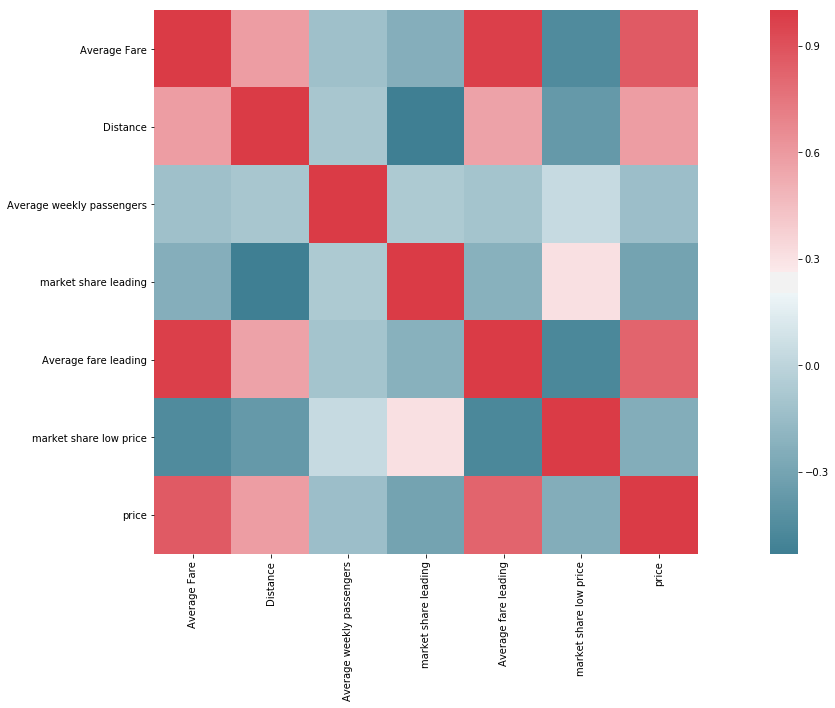

In [120]:
f, ax = plt.subplots(figsize=(26, 10))
corr = airfare_demand_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### As can be seen from correlation plot, there exist a very high correlation between average fare, average fare leading , distance and price. There also is a very high correlation between Average Fare and Average fare leading, thus we can choose to drop one column. Also, I chose Average Weekly Passengers since the price might be fluctuated by the number of passengers.

### I selected two features from the dataset, Distance and Average Weekly Passenger. 

In [121]:
airfare_demand_data = airfare_demand_data[['Distance','Average weekly passengers', 'price']]
airfare_demand_data.head()

,Distance,Average weekly passengers,price
0,528,424.56,111.03
1,860,276.84,118.94
2,852,215.76,167.12
3,288,606.84,68.86
4,723,313.04,145.42


### Preprocessing and  train/ test split

In [122]:
#normalize the data
airfare_demand_data = (airfare_demand_data-airfare_demand_data.min())/(airfare_demand_data.max()-airfare_demand_data.min())
#add bias column at index 0
airfare_demand_data.insert(0,'Bias',np.ones(1000))
#creating the Price column as predictor column
airfare_price = airfare_demand_data['price']
airfare_demand_data.drop('price',inplace=True, axis = 1)
#shuffle the dataset
index_matrices = produce_random_index(len(airfare_demand_data))
#split the dataset
X_train_airfare = airfare_demand_data.iloc[index_matrices[:800]]
X_test_airfare = airfare_demand_data.iloc[index_matrices[800:]]
Y_train_airfare = airfare_price.iloc[index_matrices[:800]].values.reshape(800,1)
Y_test_airfare = airfare_price.iloc[index_matrices[800:]].values.reshape(200,1)

MSE using GD LR 0.00001 in 500 iterations 0.154124455
MSE using GD LR 0.000001 in 500 iterations 0.761474282
MSE using GD LR 0.0000001 in 500 iterations 1.127873816
MSE using Arimijo in 10 iterations 0.155619601
MSE using BOLD in 10 iterations 0.156136151


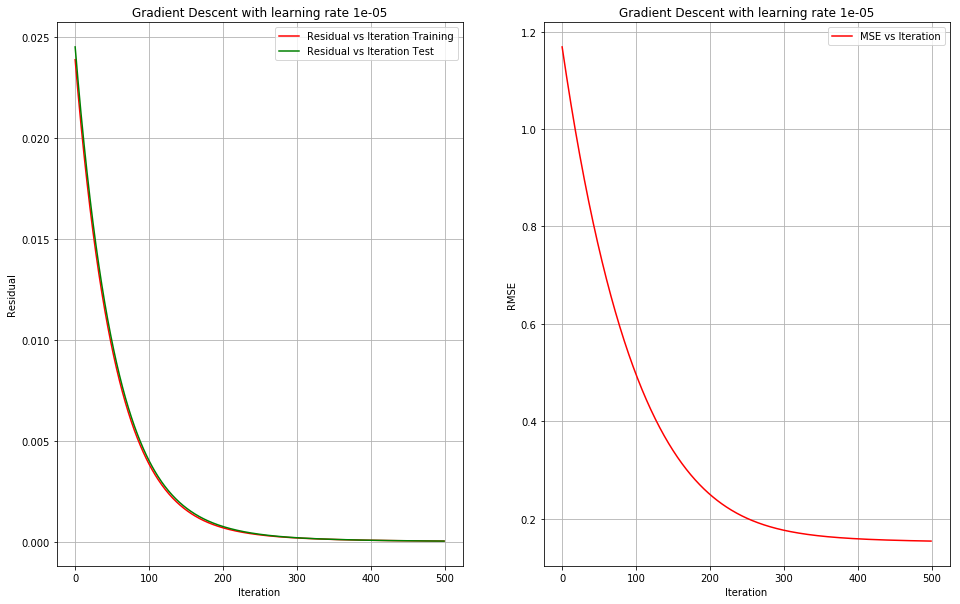

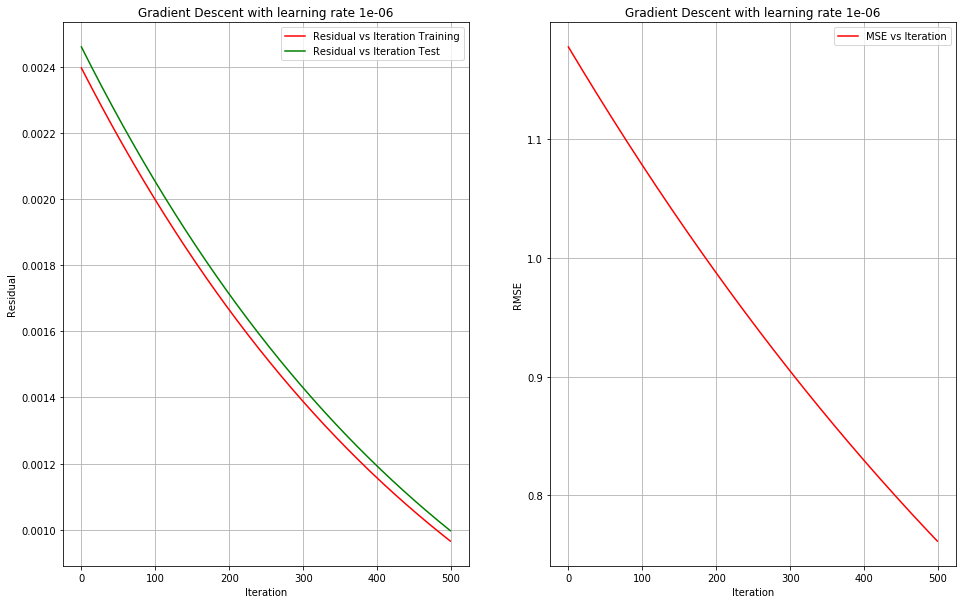

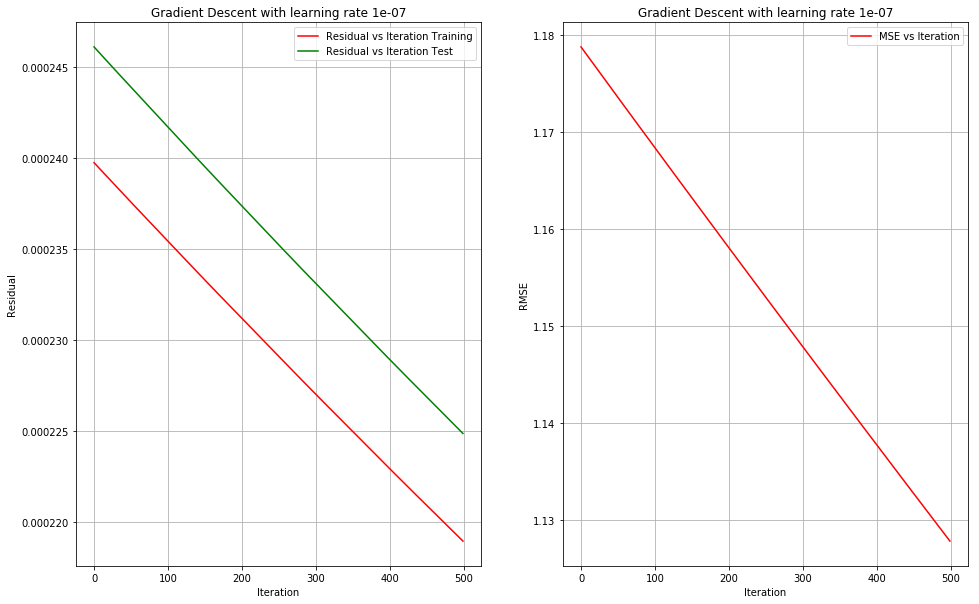

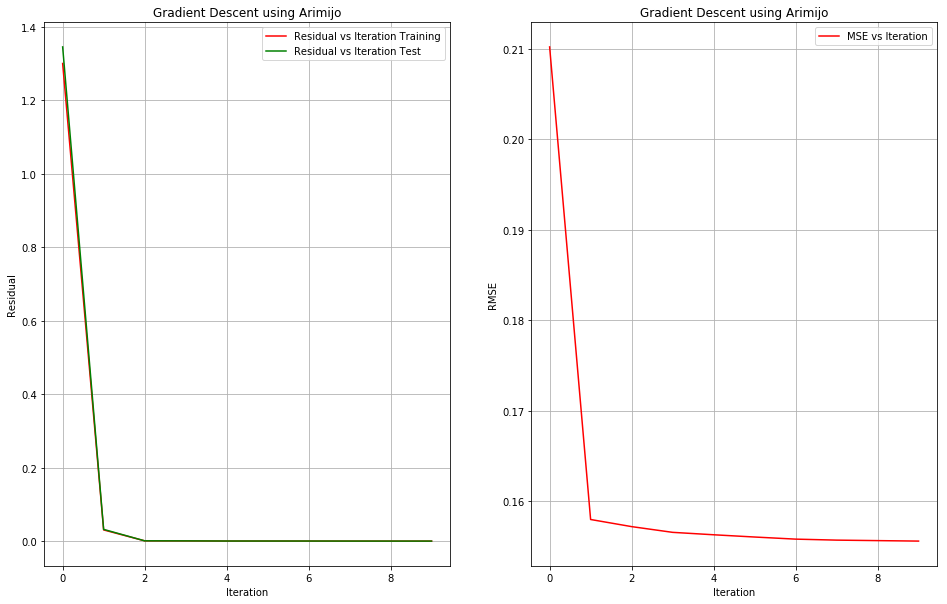

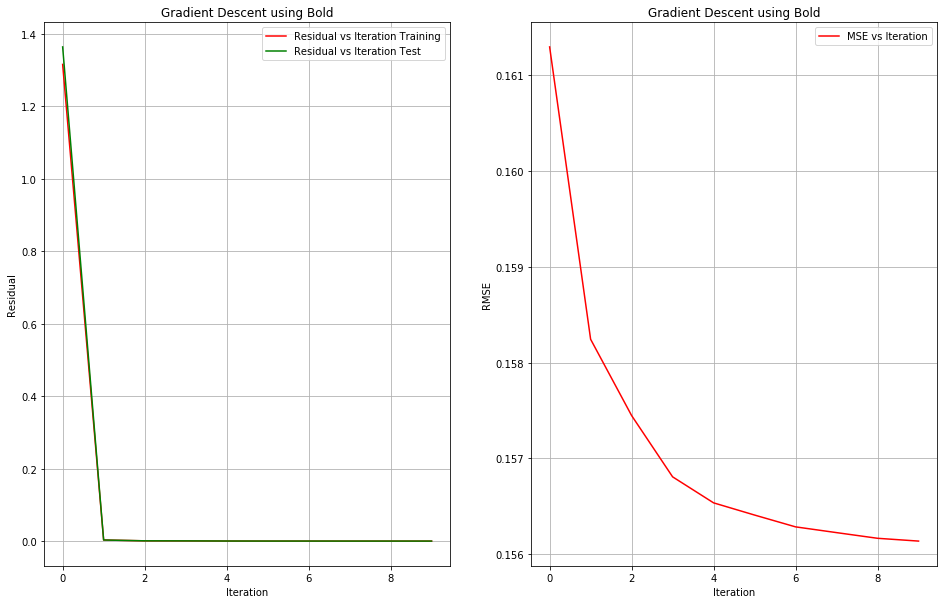

In [126]:
#perform the predictions 
m3,res_plot,rmse_plot = gradient_descent(X_train_airfare, Y_train_airfare,X_test_airfare, Y_test_airfare, alpha=0.00001, N=500)
m4,res_plot,rmse_plot = gradient_descent(X_train_airfare, Y_train_airfare,X_test_airfare, Y_test_airfare, alpha=0.000001, N=500)
m5,res_plot,rmse_plot = gradient_descent(X_train_airfare, Y_train_airfare,X_test_airfare, Y_test_airfare, alpha=0.0000001, N=500)

m1,res_plot,rmse_plot = gradient_descent_armijo(X_train_airfare, Y_train_airfare,X_test_airfare, Y_test_airfare, N= 10)
m2,res_plot,rmse_plot = gradient_descent_bold(X_train_airfare, Y_train_airfare,X_test_airfare, Y_test_airfare,  N= 10)

print(f"MSE using GD LR 0.00001 in 500 iterations {rmse(Y_test_airfare,(np.matmul(X_test_airfare,m3)))}")
print(f"MSE using GD LR 0.000001 in 500 iterations {rmse(Y_test_airfare,(np.matmul(X_test_airfare,m4)))}")
print(f"MSE using GD LR 0.0000001 in 500 iterations {rmse(Y_test_airfare,(np.matmul(X_test_airfare,m5)))}")

print(f"MSE using Arimijo in 10 iterations {rmse(Y_test_airfare,(np.matmul(X_test_airfare,m1)))}")
print(f"MSE using BOLD in 10 iterations {rmse(Y_test_airfare,(np.matmul(X_test_airfare,m2)))}")

### Gradient Descent 
   #### When the learning rate is decreased the MSE vs Iteration curve on test set is smooth, indicating a very slow convergence to the optimal   solution, hence the learning rate of 0.00001 produces the best normalised MSE scores and value further increases as we decrease the learning rate
   #### Similar to MSE, Residual trend is observed wherein when the learning rate is decreased the model's performance starts separating itself from test set and train set. This is because the model is still not optimal due to it's low learning rate , thus performing slightly better on training set than test set.
   
### Armijo and Boldstep
   #### Both armijo and boldstep are backtracking line search algorithm that rely on a particular condition to be satisfied in order for the learning rate to be decided, this essentially transforms to the notion that the learning rate must take a step in a bounded region of the function graph alone.
   #### We can observe that both armijo and boldstep take very few iterations to converge to the optimal solution due to a variable learning rate used, in the armijo we have used 0.001 steepness for armijo. 
 ## Thus we can observe that using a backtracking line search for selecting a learning rate in gradient descent search yields a better performance, but it does cause a lot more computation to calculate gradient during back tracking conditon repeatedly 

## Performing backtracking line search for learning rate using Armijo and Boldstep. Followed by Gradient Descent using exact line search for REDWINE DATA

In [147]:
non_num_wine_quality_red = wine_quality_red.select_dtypes(exclude=np.number).columns  #get the non numeric columns
len(non_num_wine_quality_red) #returned 0
#wine_quality_red= pd.get_dummies(wine_quality_red[non_num_wine_quality_red]) #since there are no non numeric columns no dummies
wine_quality_red.isna().any().tolist().count(True)   #count any undefined values

0

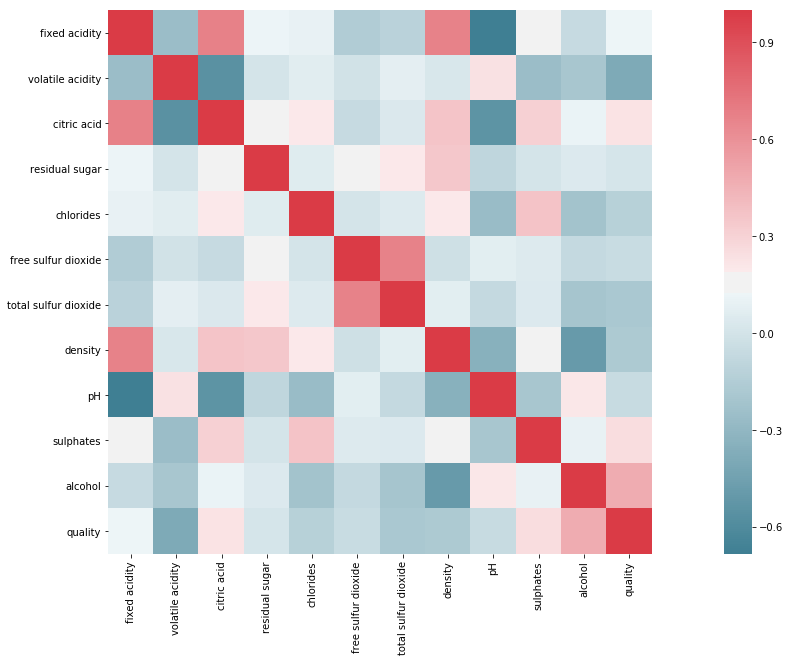

In [148]:
wine_quality_red = pd.read_csv(r'D:\Exercises\ML Lab\winequality-red.csv', sep=';')
f, ax = plt.subplots(figsize=(26, 10))
corr = wine_quality_red.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### As can be seen from correlation plot, there exist a very high correlation between alcohol, sulphates, citric acid and quality. There also is a very correlation between citric acid and sulphates, thus we can choose to drop one column. Thus, I selected two columns Alcohol and Sulphates feature to predict Quality

In [149]:
wine_quality_red = wine_quality_red[['alcohol','sulphates','quality']]

In [150]:
#normalize the data
wine_quality_red = (wine_quality_red-wine_quality_red.min())/(wine_quality_red.max()-wine_quality_red.min())
#add bias column at index 0
wine_quality_red.insert(0,'Bias',np.ones(1599))
#create income variable
wine_quality_r = wine_quality_red['quality']
wine_quality_red.drop('quality',inplace=True, axis = 1)

#shuffle the dataset
index_matrices = produce_random_index(len(wine_quality_red))
#split the dataset
X_train_red = wine_quality_red.iloc[index_matrices[:1279]]
X_test_red = wine_quality_red.iloc[index_matrices[1279:]]
Y_train_red = wine_quality_r.iloc[index_matrices[:1279]].values.reshape(1279,1)
Y_test_red = wine_quality_r.iloc[index_matrices[1279:]].values.reshape(320,1)


MSE using GD LR 0.00001 in 500 iterations 0.153507387
MSE using GD LR 0.000001 in 500 iterations 0.505843392
MSE using GD LR 0.0000001 in 500 iterations 0.935640297
MSE using Arimijo in 10 iterations 0.154920306
MSE using BOLD in 10 iterations 0.155085292


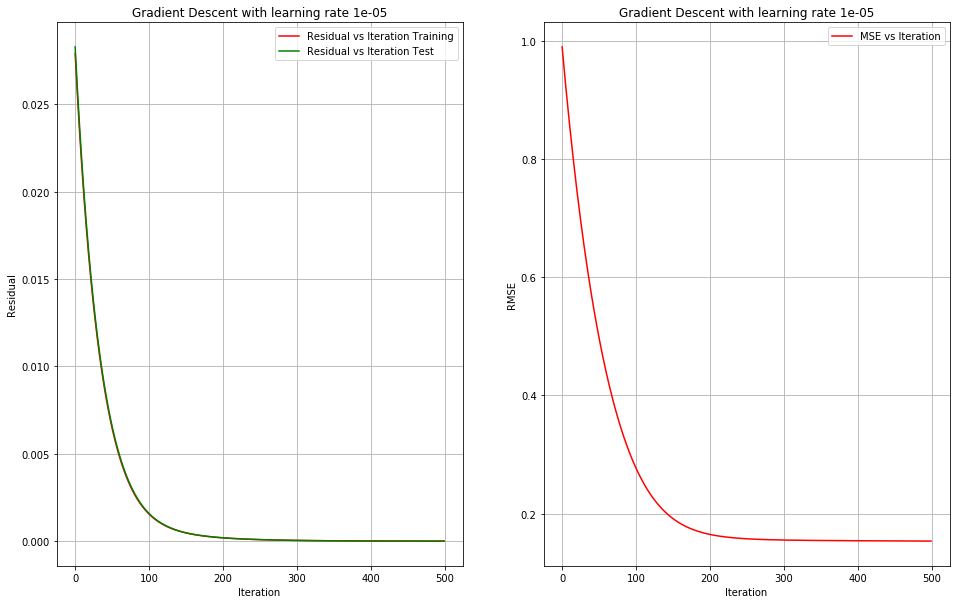

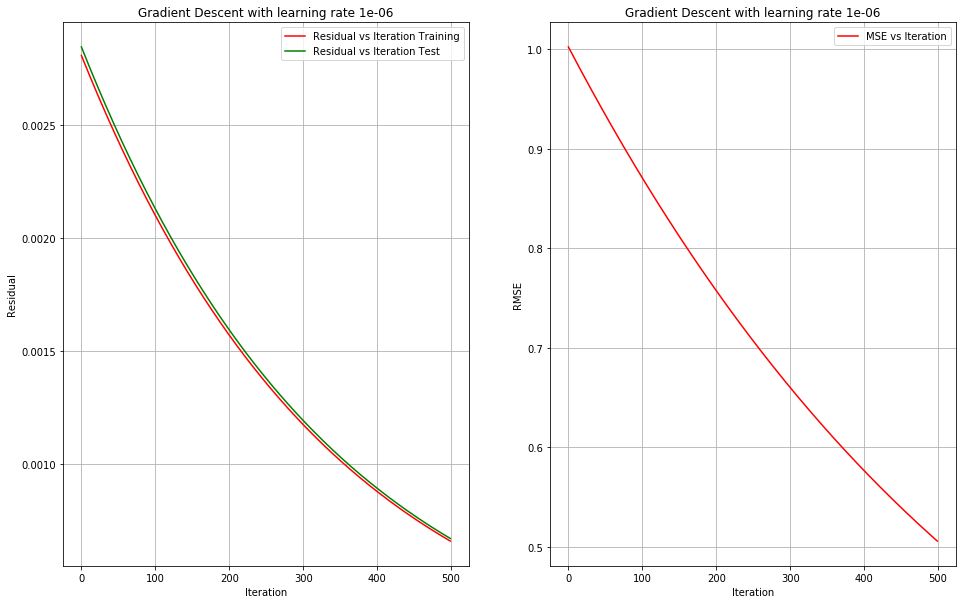

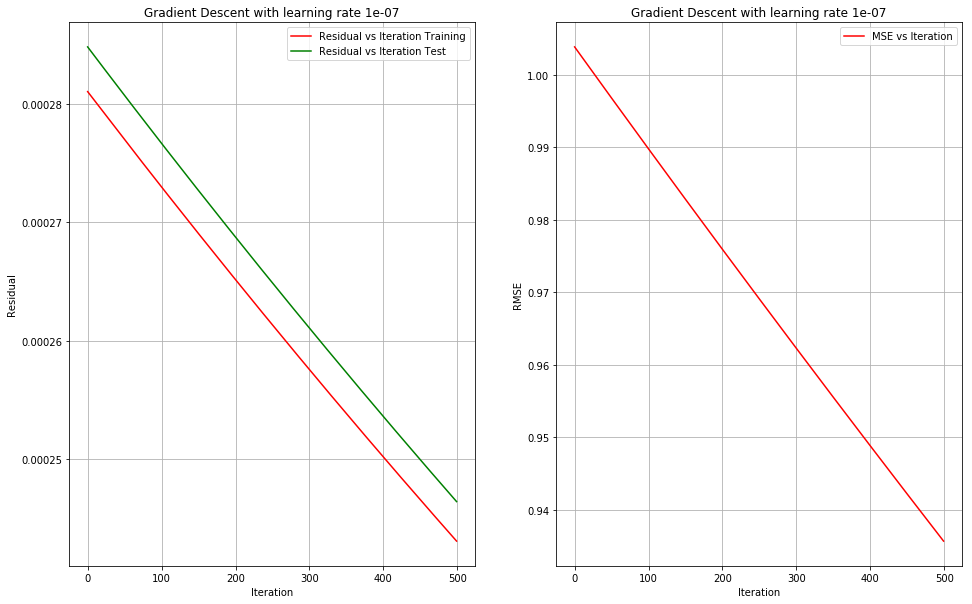

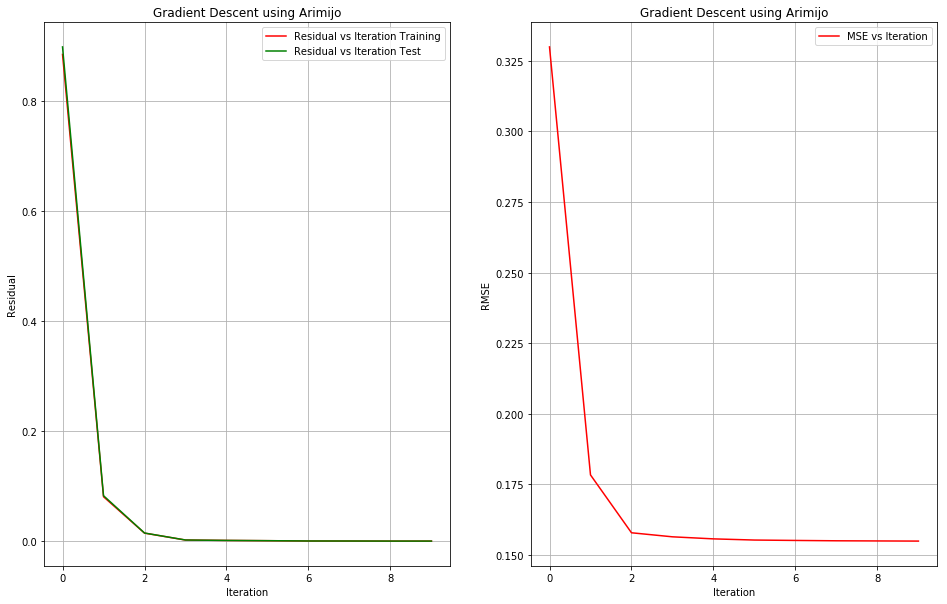

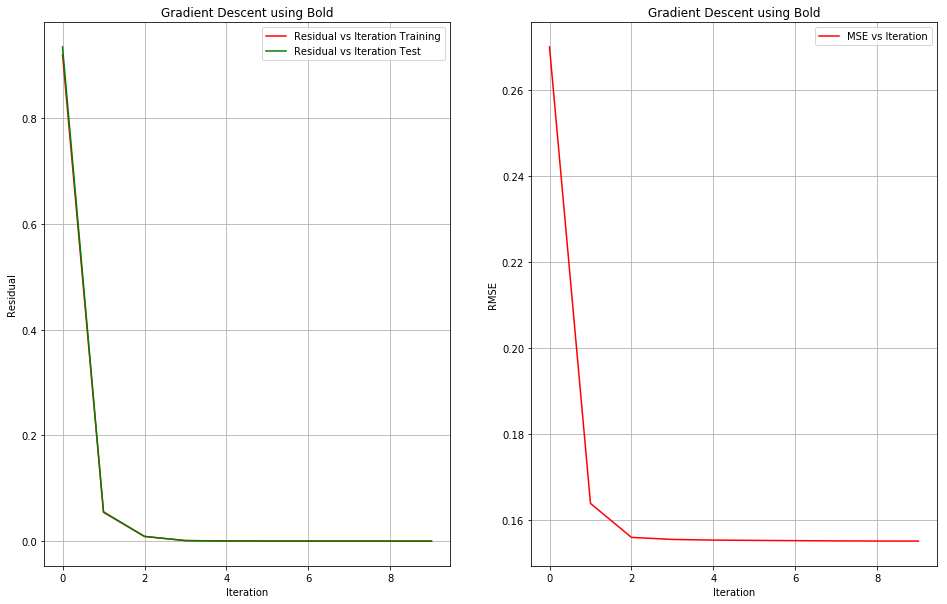

In [151]:
m3,res_plot,rmse_plot = gradient_descent(X_train_red, Y_train_red,X_test_red, Y_test_red, alpha=0.00001, N=500)
m4,res_plot,rmse_plot = gradient_descent(X_train_red, Y_train_red,X_test_red, Y_test_red, alpha=0.000001, N=500)
m5,res_plot,rmse_plot = gradient_descent(X_train_red, Y_train_red,X_test_red, Y_test_red, alpha=0.0000001, N=500)

m1,res_plot,rmse_plot = gradient_descent_armijo(X_train_red, Y_train_red,X_test_red, Y_test_red, N= 10)
m2,res_plot,rmse_plot = gradient_descent_bold(X_train_red, Y_train_red,X_test_red, Y_test_red, N=10)

print(f"MSE using GD LR 0.00001 in 500 iterations {rmse(Y_test_red,(np.matmul(X_test_red,m3)))}")
print(f"MSE using GD LR 0.000001 in 500 iterations {rmse(Y_test_red,(np.matmul(X_test_red,m4)))}")
print(f"MSE using GD LR 0.0000001 in 500 iterations {rmse(Y_test_red,(np.matmul(X_test_red,m5)))}")

print(f"MSE using Arimijo in 10 iterations {rmse(Y_test_red,(np.matmul(X_test_red,m1)))}")
print(f"MSE using BOLD in 10 iterations {rmse(Y_test_red,(np.matmul(X_test_red,m2)))}")


### Gradient Descent 
   #### When the learning rate is decreased the MSE vs Iteration curve on test set is smooth, indicating a very slow convergence to the optimal   solution, hence the learning rate of 0.00001 produces the best normalised MSE scores and value further increases as we decrease the learning rate
   #### Similar to MSE, Residual trend is observed wherein when the learning rate is decreased the model's performance starts separating itself from test set and train set. This is because the model is still not optimal due to it's low learning rate , thus performing slightly better on training set than test set.
   
### Armijo and Boldstep
   #### Both armijo and boldstep are backtracking line search algorithm that rely on a particular condition to be satisfied in order for the learning rate to be decided, this essentially transforms to the notion that the learning rate must take a step in a bounded region of the functin graph alone.
   #### We can observe that both armijo and boldstep take very few iterations to converge to the optimal solution due to a variable learning rate used, in the armijo we have used 0.001 steepness for armijo. 
 ## Thus we can observe that using a backtracking line search for selecting a learning rate in gradient descent search yields a better performance, but it does cause a lot more computation to calculate gradient during back tracking conditon repeatedly.

## Performing backtracking line search for learning rate using Armijo and Boldstep. Followed by Gradient Descent using exact line search for WHITE WINE DATA

In [155]:
non_num_wine_quality_white = wine_quality_white.select_dtypes(exclude=np.number).columns #get the non numeric columns
len(non_num_wine_quality_white)   #returned 0
#wine_quality_red= pd.get_dummies(wine_quality_red[non_num_wine_quality_red])  #since there are no non numeric columns no dummies
wine_quality_white.isna().any().tolist().count(True)    #count any undefined values

0

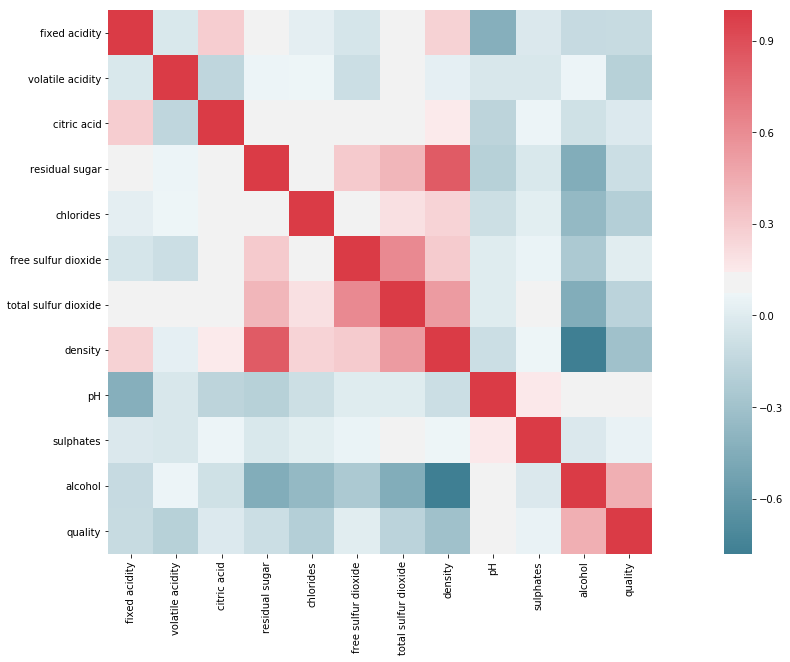

In [156]:
wine_quality_white = pd.read_csv(r'D:\Exercises\ML Lab\winequality-white.csv', sep=';')
f, ax = plt.subplots(figsize=(26, 10))
corr = wine_quality_white.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### As can be seen from correlation plot, there exist a very high correlation between alcohol and quality.  I also selected the pH feature since the performance after adding pH as a single feature was better compared to adding other features in the first step of forward variable selection regression process.

In [157]:
wine_quality_white = wine_quality_white[['alcohol','pH','quality']]

In [158]:
#normalize the data
wine_quality_white = (wine_quality_white-wine_quality_white.min())/(wine_quality_white.max()-wine_quality_white.min())
#add bias column at index 0
wine_quality_white.insert(0,'Bias',np.ones(4898))
#create income variable
wine_quality = wine_quality_white['quality']
wine_quality_white.drop('quality',inplace=True, axis = 1)

#shuffle the dataset
index_matrices = produce_random_index(len(wine_quality_white))
#split the dataset
X_train_white = wine_quality_white.iloc[index_matrices[:2000]]
X_test_white = wine_quality_white.iloc[index_matrices[2000:3000]]
Y_train_white = wine_quality.iloc[index_matrices[:2000]].values.reshape(2000,1)
Y_test_white = wine_quality.iloc[index_matrices[2000:3000]].values.reshape(1000,1)



MSE using GD LR 0.00001 in 500 iterations 0.157710596
MSE using GD LR 0.000001 in 500 iterations 0.395977753
MSE using GD LR 0.0000001 in 500 iterations 1.210770891
MSE using Arimijo in 10 iterations 0.164677593
MSE using BOLD in 10 iterations 0.164762886


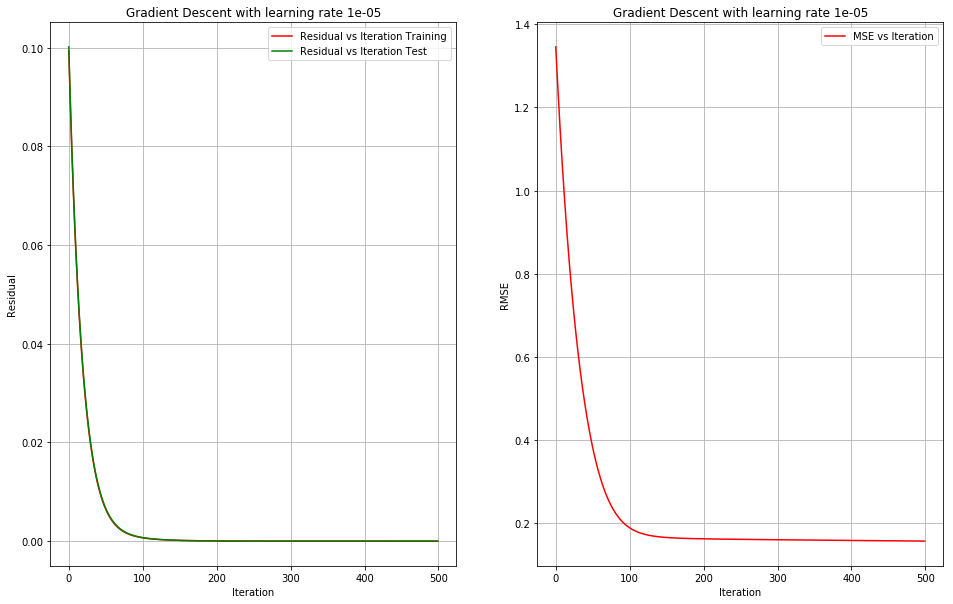

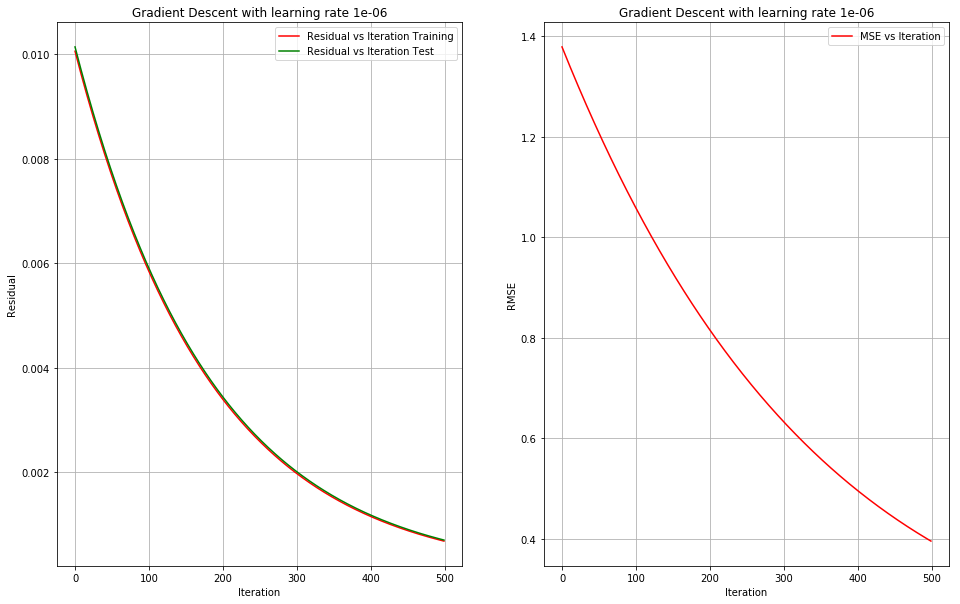

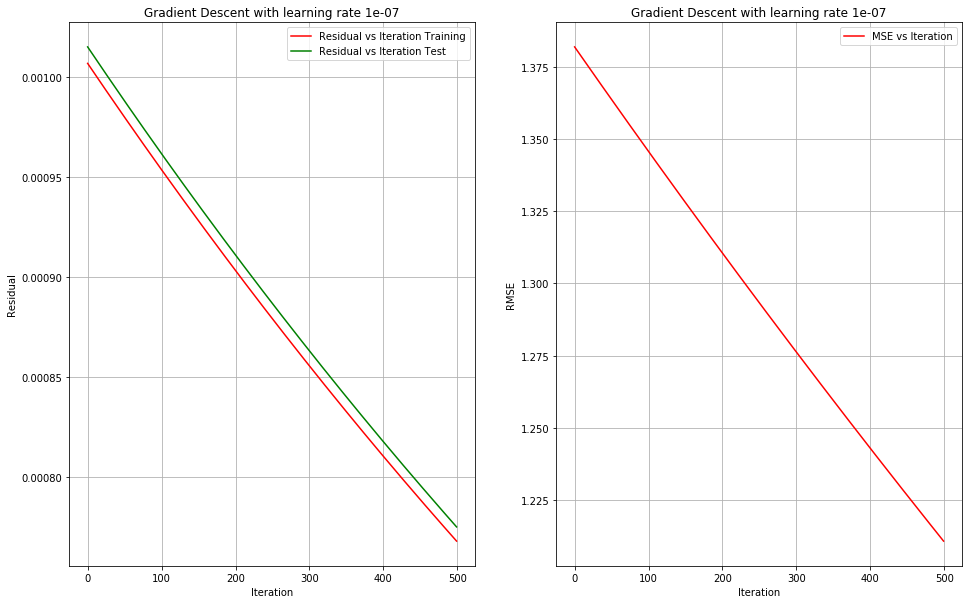

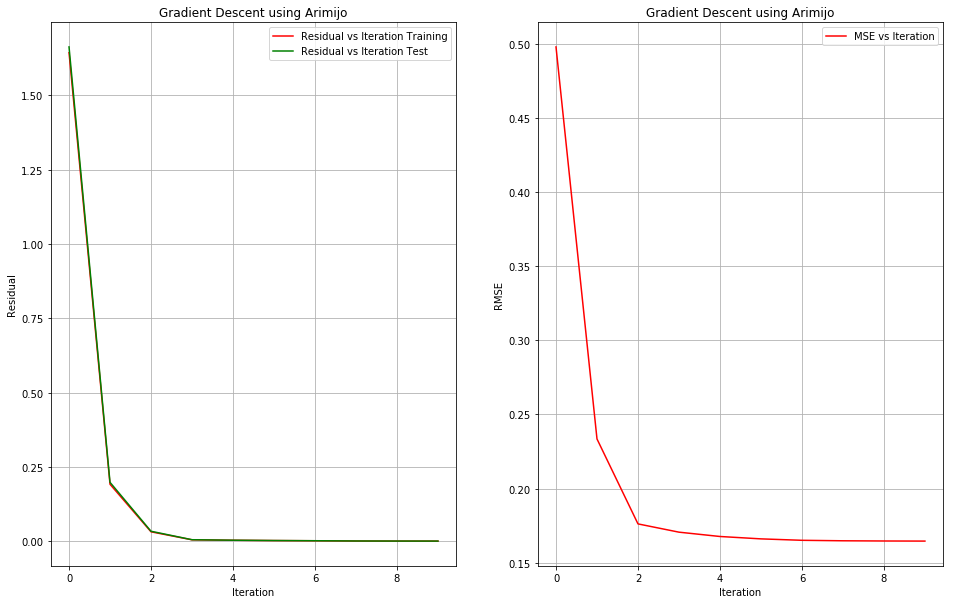

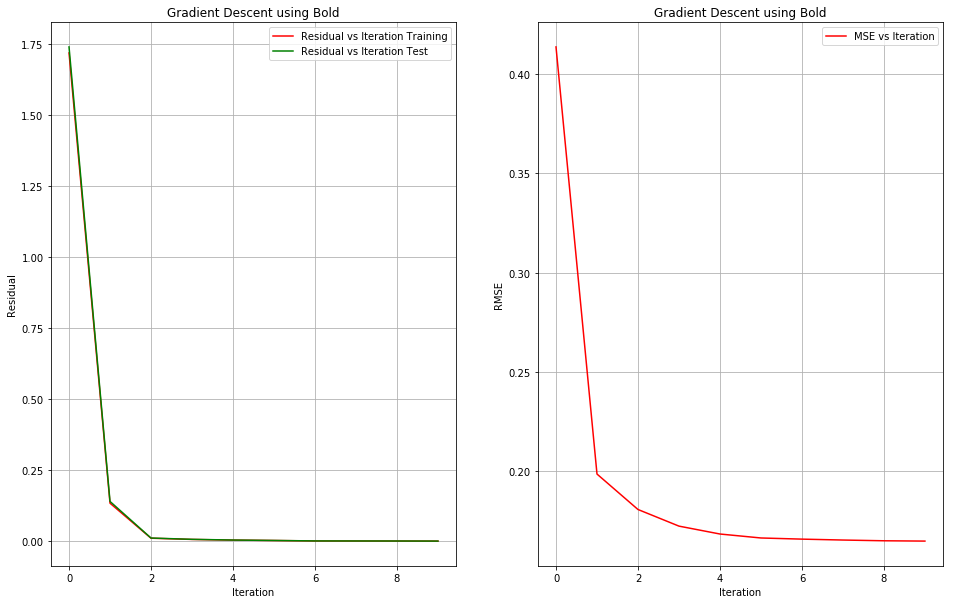

In [159]:
m3,res_plot,rmse_plot = gradient_descent(X_train_white, Y_train_white,X_test_white, Y_test_white, alpha=0.00001, N=500)
m4,res_plot,rmse_plot = gradient_descent(X_train_white, Y_train_white,X_test_white, Y_test_white, alpha=0.000001, N=500)
m5,res_plot,rmse_plot = gradient_descent(X_train_white, Y_train_white,X_test_white, Y_test_white, alpha=0.0000001, N=500)

m1,res_plot,rmse_plot = gradient_descent_armijo(X_train_white, Y_train_white,X_test_white, Y_test_white,N=10)
m2,res_plot,rmse_plot = gradient_descent_bold(X_train_white, Y_train_white,X_test_white, Y_test_white,N=10)

print(f"MSE using GD LR 0.00001 in 500 iterations {rmse(Y_test_white,(np.matmul(X_test_white,m3)))}")
print(f"MSE using GD LR 0.000001 in 500 iterations {rmse(Y_test_white,(np.matmul(X_test_white,m4)))}")
print(f"MSE using GD LR 0.0000001 in 500 iterations {rmse(Y_test_white,(np.matmul(X_test_white,m5)))}")

print(f"MSE using Arimijo in 10 iterations {rmse(Y_test_white,(np.matmul(X_test_white,m1)))}")
print(f"MSE using BOLD in 10 iterations {rmse(Y_test_white,(np.matmul(X_test_white,m2)))}")


### Gradient Descent 
   #### When the learning rate is decreased the MSE vs Iteration curve on test set is smooth, indicating a very slow convergence to the optimal   solution, hence the learning rate of 0.0001 produces the best normalised MSE scores and value further increases as we decrease the learning rate
   #### Similar to MSE, Residual trend is observed wherein when the learning rate is decreased the model's performance starts separating itself from test set and train set. This is because the model is still not optimal due to it's low learning rate , thus performing slightly better on training set than test set.
   
### Armijo and Boldstep
   #### Both armijo and boldstep are backtracking line search algorithm that rely on a particular condition to be satisfied in order for the learning rate to be decided, this essentially transforms to the notion that the learning rate must take a step in a bounded region of the function graph alone.
   #### We can observe that both armijo and boldstep take very few iterations to converge to the optimal solution due to a variable learning rate used, in the armijo we have used 0.001 steepness for armijo. 
 ## Thus we can observe that using a backtracking line search for selecting a learning rate in gradient descent search yields a better performance, but it does cause a lot more computation to calculate gradient during back tracking conditon repeatedly.